In [3]:
#Imports 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml 
from sklearn.decomposition import PCA 

In [2]:
mnist = fetch_openml('mnist_784')
mnist

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X, y = mnist["data"], mnist["target"]

Three different methods to find how many dimensions to preverse using PCA

In [9]:
pca = PCA()
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
print("We need to reduce the number of dimensions to",d)

We need to reduce the number of dimensions to 154


Text(0, 0.5, 'Explained Variance')

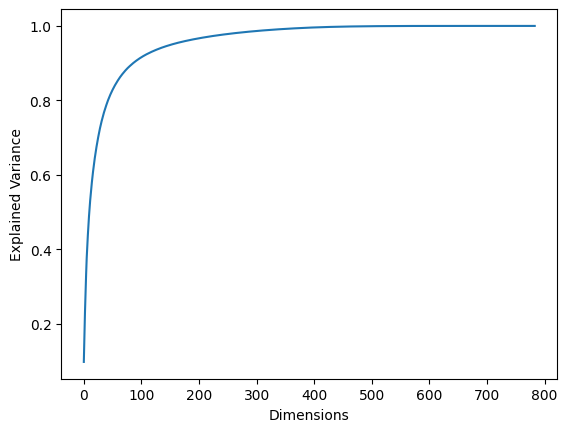

In [13]:
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

The graph also shows around 100-150 is where the varianc stops changing so we can reduce the dimensions to around that level without loosing most of the data

We can also just set the n_components to a float indicating how much of the variance we want to preserve

In [18]:
pca = PCA(n_components=0.95) 
pca.fit(X) 
np.argmax(np.cumsum(pca.explained_variance_ratio_))

153

In [19]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=153)
n_batches = 100 

for X_batch in np.array_split(X, n_batches):
    ipca.partial_fit(X_batch)

X_reduced = ipca.transform(X)

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [20]:
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/opt/homebrew/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
from sklearn.ensemble import RandomForestClassifier
import time 

rfc = RandomForestClassifier()

start = time.time()

rfc.fit(X_train, y_train)

end = time.time()
print(end - start)

22.983469009399414


In [25]:
from sklearn.metrics import accuracy_score

prediction = rfc.predict(X_test)
print('accuracy:', accuracy_score(prediction, y_test))

accuracy: 0.9689


In [27]:
# Making Pipeline
from sklearn.pipeline import Pipeline

pca_rfc = Pipeline(
    [
        ('reduction', PCA(n_components=0.95)),
        ('Classifier', RandomForestClassifier()) 

    ]
)


In [39]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
rfc_dr = RandomForestClassifier()

In [40]:
start = time.time()
rfc_dr.fit(X_train_pca, y_train)
end = time.time()
print(end-start)

61.54826283454895


In [43]:
X_test_pca = pca.transform(X_test)
predictions = rfc_dr.predict(X_test_pca)
print('accuracy:', accuracy_score(predictions, y_test))

accuracy: 0.9474


In [29]:
# Using Pipeline
start = time.time()
pca_rfc.fit(X_train, y_train)
end = time.time()
print(end-start)

70.884357213974
